In [1]:
#imports
import pickle
import pandas as pd
import numpy as np


In [2]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('data/apple_df_ML.pkl', 'rb'))


In [96]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[116.759684, 116.865102, 116.747758, ..., 116.736085, 116.768768,
        116.790573],
       [114.420705, 114.002524, 113.957528, ..., 114.433863, 114.488096,
        114.661564],
       [113.606819, 113.845019, 113.947424, ..., 115.136823, 115.125646,
        115.174199],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 138.915147, 138.994524,
        138.938381],
       [137.599456, 137.384981, 137.338305, ..., 139.948746, 139.987529,
        139.921587],
       [137.627544, 137.508483, 137.48028 , ..., 136.956956, 136.90308 ,
        136.792118]])

In [97]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1204)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [101]:
scaler.fit(X_train)

MinMaxScaler()

In [102]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations

In [105]:
model = Sequential()

model.add(Dense(units=750, activation=activations.gelu))
model.add(Dropout(0.02))

model.add(Dense(units=1, activation=activations.sigmoid))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [106]:
#train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
model.fit(x=X_train, y=y_train, epochs=1000, batch_size=256, validation_data=(X_test, y_test), verbose=1, callbacks=[callback])

Epoch 1/1000
2/2 [==============================] - 1s 115ms/step - loss: 0.6933 - val_loss: 0.6929
Epoch 2/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6934 - val_loss: 0.6916
Epoch 3/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6931 - val_loss: 0.6914
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.6930 - val_loss: 0.6916
Epoch 5/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.6930 - val_loss: 0.6920
Epoch 6/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6931 - val_loss: 0.6921
Epoch 7/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6931 - val_loss: 0.6925
Epoch 8/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6930 - val_loss: 0.6926
Epoch 9/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.6930 - val_loss: 0.6923
Epoch 10/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.6930 - val_loss: 0.6921
Epoch 11

<AxesSubplot:>

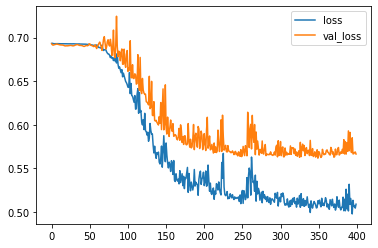

In [107]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
# if model.predict(X_test) > 0.44 then 1 else 0:
predictions = model.predict(X_test)
offset = .00
predictions[predictions > (predictions.mean() + offset)] = 1
predictions[predictions <= (predictions.mean() + offset)] = 0
predictions

3/3 [==============================] - 0s 2ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [110]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        42
           1       0.74      0.69      0.71        54

    accuracy                           0.69        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.69      0.69      0.69        96



In [111]:
confusion_matrix(y_test, predictions)

array([[29, 13],
       [17, 37]])

In [112]:
#save the mode
model.save('models/apple_model_ML.h5')